 <span style="color:blue; font-size:30px"> Adult Census Income Dataset</span>

<span style="color:red; font-size:20px">Problem Statement</span>

<span style="color:black; font-size:15px">The Adult Census Income dataset contains demographic, educational, and employment-related information about individuals collected from the U.S. Census Bureau. .</span>


<span style="color:black; font-size:15px">The challenge is to analyze this data and build a machine learning model that can accurately predict whether an individual earns more than $50,000 per year.</span>

<span style="color:red; font-size:20px"> Objective</span>

<span style="color:black; font-size:15px">The main objectives of this project are to:

1. Understand the demographic and employment factors that influence income

2. Explore and identify meaningful patterns within the census data

3. Build and evaluate multiple machine learning models to classify individuals into:

    a. ≤50K income

    b. >50K income </span>

<span style="color:red; font-size:20px">Machine Learning(ML) Flow)</span>

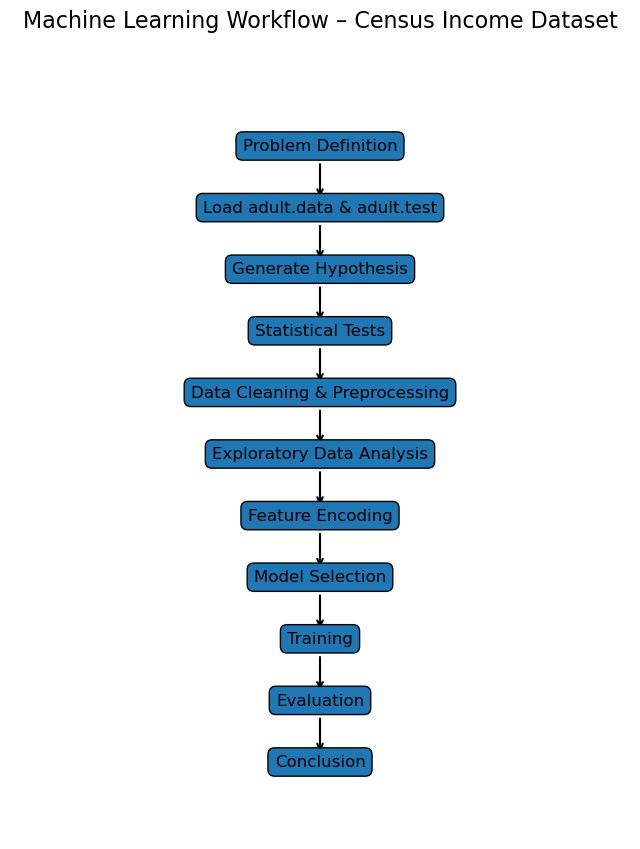

In [147]:
import matplotlib.pyplot as plt

# Steps in the ML workflow
steps = [
    "Problem Definition",
    "Load adult.data & adult.test",
    "Generate Hypothesis",
    "Statistical Tests",
    "Data Cleaning & Preprocessing",
    "Exploratory Data Analysis",
    "Feature Encoding",
    "Model Selection",
    "Training",
    "Evaluation",
    "Conclusion"
]

# Create figure
plt.figure(figsize=(8, 10))
plt.axis("off")

# Title with padding
plt.title("Machine Learning Workflow – Census Income Dataset", fontsize=16, pad=30)

# Starting Y position
y = 0.9
step_gap = 0.08  # vertical spacing between boxes

# Plot each step
for i, step in enumerate(steps):
    plt.text(
        0.5, y, step,
        ha="center", va="center",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.4", edgecolor="black")
    )
    
    # Draw arrow except for the last step
    if i < len(steps) - 1:
        plt.annotate(
            "",
            xy=(0.5, y - step_gap + 0.01),
            xytext=(0.5, y - 0.02),
            arrowprops=dict(arrowstyle="->", lw=1.5)
        )
    
    y -= step_gap

plt.show()


<span style="color:black; font-size:15px">1. Data Understanding

      Understand the dataset structure, variables, data types, and the target variable to define the problem clearly.

2. Data Cleaning

      Handle missing values, remove inconsistencies, and treat outliers to ensure high-quality data for modeling.

3. Exploratory Data Analysis (EDA)

      Analyze data patterns, distributions, and relationships between features and the target variable.

4. Hypothesis Testing

      Use statistical tests to validate assumptions and determine whether relationships between variables are significant.

5. Feature Engineering

      Transform, encode, scale, and select features to make the data suitable for machine learning algorithms.

6. Model Building

      Train multiple machine learning models to learn patterns from the data and make predictions.

7. Model Evaluation

      Evaluate model performance using appropriate metrics and select the best-performing model.</span>

<span style="color:red; font-size:20px">1. Data Understanding</span>

<span style="color:blue; font-size:15px">Loading data</span>

In [118]:
import pandas as pd
import numpy as np

columns = [ 'age','workclass','fnlwgt','education','education_num',
            'marital_status','occupation','relationship','race','sex',
            'capital_gain','capital_loss','hours_per_week','native_country','income']

adult_data = pd.read_csv( "C:/Users/suren/OneDrive/Desktop/ml dataset adult/adult.data", names=columns, sep=",", skipinitialspace=True)
adult_test = pd.read_csv( "C:/Users/suren/OneDrive/Desktop/ml dataset adult/adult.test", names=columns, sep=",", skipinitialspace=True, skiprows=1)  

In [106]:
adult_data.shape

(32561, 15)

In [122]:
adult_test.shape

(16281, 15)

In [151]:
# Merged dataframe
adult_df = pd.concat([adult_data, adult_test], axis=0)

In [126]:
adult_df.shape

(48842, 15)

In [114]:
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [56]:
# View data
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [128]:
#view sample data
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [130]:
#Data Information
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [132]:
#Summary Statistics
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [134]:
#Missing values
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [136]:
#exporting dataset as csv file
adult_df.to_csv('C:/Users/suren/OneDrive/Desktop/ml dataset adult/adult_dataset.csv', index=False)

In [67]:
# Missing values are represented as "?" 

In [140]:
(adult_df == '?').sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

<span style="color:red; font-size:13px"> variables workclass, occupation and native_country contains missing values</span>

In [ ]:
<span style="color:black; font-size:15px">.</span>

In [ ]:
<span style="color:black; font-size:15px">.</span>